# 📚 LLM Book Recommender System
<hr style="border:1px solid #ccc">

## 👨‍💻 Author: **Muhammad Haweras**

[![LinkedIn](https://img.shields.io/badge/LinkedIn-blue?logo=linkedin&logoColor=white)](https://www.linkedin.com/in/muhammad-haweras-7aa6b11b2/)
[![GitHub](https://img.shields.io/badge/GitHub-100000?logo=github&logoColor=white)](https://github.com/MuhammadHaweras)

<hr style="border:1px solid #ccc">

### 📊 About the Dataset

🔗 **Dataset Link:** [7K Books with Metadata](https://www.kaggle.com/datasets/dylanjcastillo/7k-books-with-metadata)

---

### 📘 **Columns:**

| Column Name       | Description                                         |
|-------------------|-----------------------------------------------------|
| `isbn13`          | 📖 ISBN-13 Identifier                               |
| `isbn10`          | 🔢 ISBN-10 Identifier                               |
| `title`           | 📕 Title of the book                                |
| `subtitle`        | 📓 Subtitle of the book (if any)                    |
| `authors`         | ✍️ Authors of the book (separated by `;`)           |
| `categories`      | 🗂️ Book genres/categories (separated by `;`)         |
| `thumbnail`       | 🖼️ URL to book cover image                          |
| `description`     | 🧾 Summary or description of the book               |
| `published_year`  | 📅 Year the book was published                      |
| `average_rating`  | ⭐ Average rating from Goodreads                     |
| `num_pages`       | 📄 Total number of pages                            |
| `ratings_count`   | 📈 Total number of ratings received on Goodreads    |

---

### 🙏 Acknowledgements

> This dataset is built upon the **Goodreads-books** dataset originally compiled by **Soumik** and further enhanced by **Dylan Castillo**.

---

<style>
table {
    border-collapse: collapse;
}
th, td {
    padding: 8px 12px;
}
</style>


## Importing Libraries


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

In [36]:
df = pd.read_csv('books.csv')
df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,"A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst the world...",2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,"A new 'Christie for Christmas' -- a full-length novel adapted from her acclaimed play by Charles Osborne Following BLACK COFFEE and THE UNEXPECTED GUEST comes the final Agatha Christie play novelisation, bringing her superb storytelling to a new legion of fans. Clarissa, the wife of a Foreign Office diplomat, is given to daydreaming. 'Supposing I were to come down one morning and find a dead body in the library, what should I do?' she muses. Clarissa has her chance to find out when she discovers a body in the drawing-room of her house in Kent. Desperate to dispose of the body before her husband comes home with an important foreign politician, Clarissa persuades her three house guests to become accessories and accomplices. It seems that the murdered man was not unknown to certain members of the house party (but which ones?), and the search begins for the murderer and the motive, while at the same time trying to persuade a police inspector that there has been no murder at all... SPID...",2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQawwEACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,Volume Two of Stephen Donaldson's acclaimed second trilogy featuing the compelling anti-hero Thomas Covenant.,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2TgANz74C&printsec=frontcover&img=1&zoom=1&source=gbs_api,"A memorable, mesmerizing heroine Jennifer -- brilliant, beautiful, an attorney on the way up until the Mafia's schemes win her the hatred of an implacable enemy -- and a love more destructive than hate. A dangerous, dramatic world The Dark Arena of organized crime and flashbulb lit courtrooms where ambitious prosecutors begin their climb to political power.",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5XsFcpGIC&printsec=frontcover&img=1&zoom=1&source=gbs_api,"Lewis' work on the nature of love divides love into four categories; Affection, Friendship, Eros and Charity. The first three come naturally to humanity. Charity, however, the Gift-love of God, is divine, and without this supernatural love, the natural loves become distorted and even dangerous.",2002.0,4.15,170.0,33684.0


### Exploring Data
<hr>

In [37]:
df.shape

(6810, 12)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


In [39]:
df.describe()

,isbn13,published_year,average_rating,num_pages,ratings_count
count,6.810000e+03,6804.000000,6767.000000,6767.000000,6.767000e+03
mean,9.780677e+12,1998.630364,3.933284,348.181026,2.106910e+04
std,6.068911e+08,10.484257,0.331352,242.376783,1.376207e+05
min,9.780002e+12,1853.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,1996.000000,3.770000,208.000000,1.590000e+02
50%,9.780553e+12,2002.000000,3.960000,304.000000,1.018000e+03
75%,9.780810e+12,2005.000000,4.130000,420.000000,5.992500e+03
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06


In [40]:
df.isnull().sum()

isbn13               0
isbn10               0
title                0
subtitle          4429
authors             72
categories          99
thumbnail          329
description        262
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64

In [41]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

print(missing_percentage_sorted.round(2).astype(str) + ' %')

subtitle          65.04 %
thumbnail          4.83 %
description        3.85 %
categories         1.45 %
authors            1.06 %
average_rating     0.63 %
ratings_count      0.63 %
num_pages          0.63 %
published_year     0.09 %
title               0.0 %
isbn13              0.0 %
isbn10              0.0 %
dtype: object


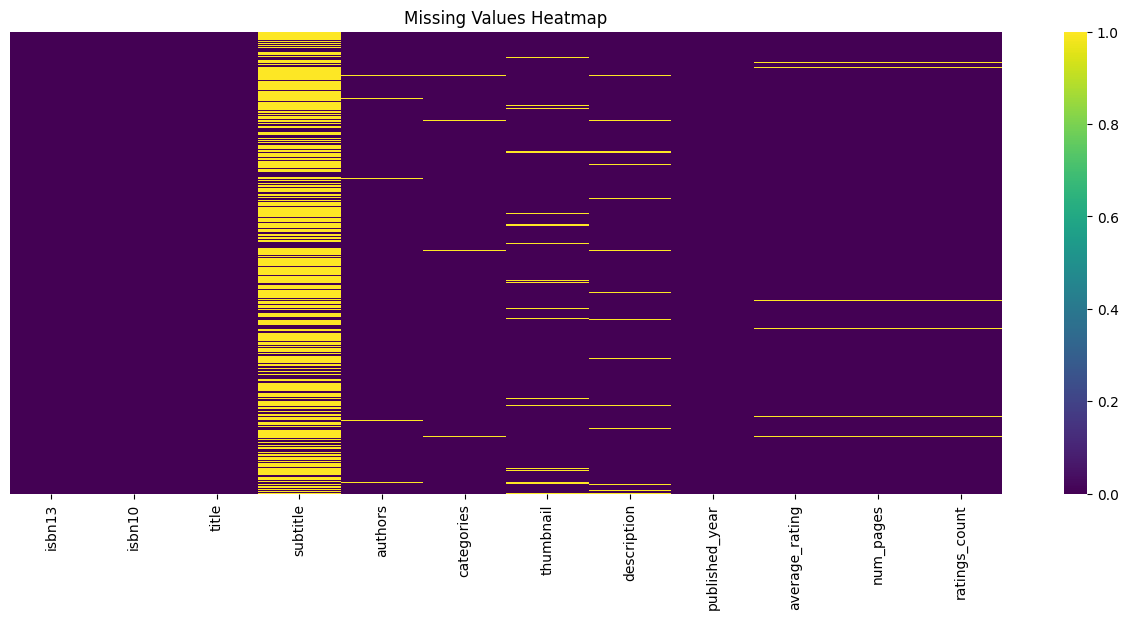

In [42]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### Observation:
* Subtitle is mostly missing
* Last three columns (`average_rating`, `num_pages` and `ratings_count`) have same patterns of missing values i.e
	if observation in one of these three columns is missing, it is missing in all these columns.

## Feature Engineering

In [43]:
df["missing_description"] = np.where(df["description"].isnull(), 1, 0) # 0 for missing, 1 for not missing

from datetime import datetime
current_year = datetime.now().year
df["book_age"] = current_year - df["published_year"]

In [44]:
imp_columns = ['num_pages', 'missing_description', 'average_rating', 'book_age']

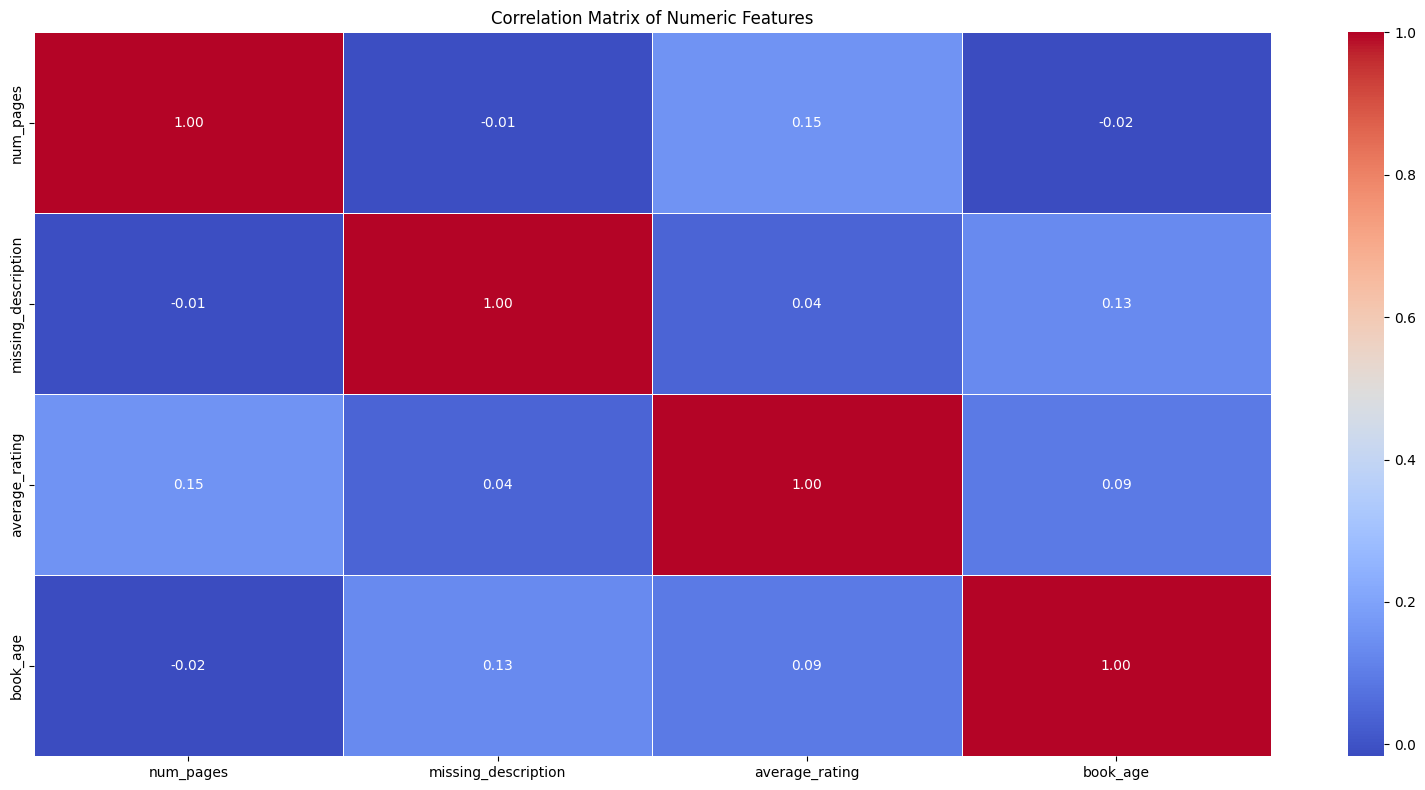

In [45]:
correlation_matrix = df[imp_columns].corr(method='spearman')

# Plot correlation heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()


### Observation:
* There is no clear correlationof `missing description` with other columns

In [46]:
missing_data = df[(df["description"].isna()) | 
					(df["num_pages"].isna()) | 
					(df["average_rating"].isna()) | 
					(df["published_year"].isna())]

missing_data

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,book_age
37,9780006906018,000690601X,The Princess of the Chalet School,NaN,Elinor Mary Brent-Dyer,Juvenile Fiction,http://books.google.com/books/content?id=EJcQPwAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,NaN,2000.0,4.10,159.0,446.0,1,25.0
60,9780007127740,000712774X,The illustrated man,NaN,Ray Bradbury,Fiction,http://books.google.com/books/content?id=kePqlVft1bQC&printsec=frontcover&img=1&zoom=1&source=gbs_api,NaN,2002.0,4.14,186.0,56781.0,1,23.0
99,9780020442806,0020442807,"The Chronicles of Narnia: Lion, the witch and the wardrobe",NaN,Clive Staples Lewis,Fairy tales,NaN,NaN,1978.0,4.26,1425.0,1446.0,1,47.0
102,9780023513206,0023513209,Reason in History,A General Introduction to the Philosophy of History,Georg Wilhelm Friedrich Hegel,Philosophy,http://books.google.com/books/content?id=BCvcYQEACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,NaN,1953.0,3.64,95.0,430.0,1,72.0
105,9780026995016,0026995018,Spandau,The Secret Diaries,Albert Speer,History,NaN,NaN,1976.0,4.12,463.0,6.0,1,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6787,9783464371640,3464371646,About a Boy,NaN,Nick Hornby,NaN,http://books.google.com/books/content?id=PuDYwAEACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,NaN,2002.0,3.80,256.0,155.0,1,23.0
6788,9783540292128,3540292128,Enzyme-Catalyzed Synthesis of Polymers,NaN,Shiro Kobayashi;Helmut Ritter;David Kaplan,Science,http://books.google.com/books/content?id=WXOym0xs3vYC&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api,NaN,2006.0,0.00,254.0,0.0,1,19.0
6798,9787506435673,7506435675,Good Fight,NaN,Judd Winick;Matthew Clark,Juvenile Fiction,http://books.google.com/books/content?id=xGPZAQAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,"Presents the adventures of a new group of heroes, including Grace, a bouncer working at a metahuman club; cyborg girl Indigo; Thunder, the mass-changing daughter of Black Lightning, and the shape shifter, Metamorpho.",2007.0,NaN,NaN,NaN,0,18.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVpL1byOkC&printsec=frontcover&img=1&zoom=1&source=gbs_api,NaN,1993.0,4.08,74.0,324.0,1,32.0


In [47]:
missing_rows = missing_data.shape[0]

total_rows = df.shape[0]

percentage_missing = (missing_rows / total_rows) * 100

print(f"Number of rows with missing values: {missing_rows}")
print(f"Total number of rows: {total_rows}")
print(f"Percentage of rows with missing values: {percentage_missing:.2f}%")

columns_to_check = ["description", "num_pages", "average_rating", "published_year"]
for column in columns_to_check:
	missing_count = df[df[column].isna()].shape[0]
	percentage = (missing_count / total_rows) * 100
	print(f"Missing in {column}: {missing_count} rows ({percentage:.2f}%)")

Number of rows with missing values: 303
Total number of rows: 6810
Percentage of rows with missing values: 4.45%
Missing in description: 262 rows (3.85%)
Missing in num_pages: 43 rows (0.63%)
Missing in average_rating: 43 rows (0.63%)
Missing in published_year: 6 rows (0.09%)


### Observation:

* As missing values of columns `description`, `num_pages`, `average_rating` and 
	`published_year` is less than 5 % (4.45 %) we can simply remove them.

In [48]:
cleaned_books = df[~(df["description"].isna()) & 
					~(df["num_pages"].isna()) & 
					~(df["average_rating"].isna()) & 
					~(df["published_year"].isna())]

In [49]:
cleaned_books.shape

(6507, 14)

* Let's explore categories column

In [50]:
cleaned_books['categories'].value_counts().reset_index().sort_values(by='count', ascending=False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
519,Aeronautics,1
518,Childbirth,1
517,Consumer behavior,1
516,Seduction,1


### Observation:
* There are 531 unique categories which is too much.

In [51]:
import plotly.express as px

# Get the top 20 categories
categories = cleaned_books['categories'].value_counts().reset_index()
categories.columns = ['category', 'count']
# Create the bar chart
fig = px.bar(
	categories, 
	x='category', 
	y='count',
	color='count',
	color_continuous_scale='viridis'
)

# Improve layout
fig.update_layout(
	xaxis_title='Category',
	yaxis_title='Number of Books',
	xaxis_tickangle=-45,
	height=600,
	width=1000
)

fig.show()

## Observation: 
* `category` col has long tail problem. We need to normalize it.
- But first let's have closer look on `description` column.We should consider removing very short descriptions,
  as they often lack enough context to make accurate recommendations.


In [52]:
cleaned_books['description_word_count'] = cleaned_books['description'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7836\4283049229.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
cleaned_books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,book_age,description_word_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,"A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst the world...",2004.0,3.85,247.0,361.0,0,21.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,"A new 'Christie for Christmas' -- a full-length novel adapted from her acclaimed play by Charles Osborne Following BLACK COFFEE and THE UNEXPECTED GUEST comes the final Agatha Christie play novelisation, bringing her superb storytelling to a new legion of fans. Clarissa, the wife of a Foreign Office diplomat, is given to daydreaming. 'Supposing I were to come down one morning and find a dead body in the library, what should I do?' she muses. Clarissa has her chance to find out when she discovers a body in the drawing-room of her house in Kent. Desperate to dispose of the body before her husband comes home with an important foreign politician, Clarissa persuades her three house guests to become accessories and accomplices. It seems that the murdered man was not unknown to certain members of the house party (but which ones?), and the search begins for the murderer and the motive, while at the same time trying to persuade a police inspector that there has been no murder at all... SPID...",2000.0,3.83,241.0,5164.0,0,25.0,205
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQawwEACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,Volume Two of Stephen Donaldson's acclaimed second trilogy featuing the compelling anti-hero Thomas Covenant.,1982.0,3.97,479.0,172.0,0,43.0,14
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2TgANz74C&printsec=frontcover&img=1&zoom=1&source=gbs_api,"A memorable, mesmerizing heroine Jennifer -- brilliant, beautiful, an attorney on the way up until the Mafia's schemes win her the hatred of an implacable enemy -- and a love more destructive than hate. A dangerous, dramatic world The Dark Arena of organized crime and flashbulb lit courtrooms where ambitious prosecutors begin their climb to political power.",1993.0,3.93,512.0,29532.0,0,32.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5XsFcpGIC&printsec=frontcover&img=1&zoom=1&source=gbs_api,"Lewis' work on the nature of love divides love into four categories; Affection, Friendship, Eros and Charity. The first three come naturally to humanity. Charity, however, the Gift-love of God, is divine, and without this supernatural love, the natural loves become distorted and even dan

In [54]:
# Create a histogram of description word count
import plotly.graph_objects as go

# Create histogram using Plotly
fig = px.histogram(
	cleaned_books, 
	x='description_word_count',
	marginal='box',
	title='Distribution of Description Word Count',
	labels={'description_word_count': 'Word Count'},
	color_discrete_sequence=['#636EFA']
)

# Update layout
fig.update_layout(
	xaxis_title='Description Word Count',
	yaxis_title='Frequency',
	width=900,
	height=500,
	bargap=0.05
)

fig.show()

# Display summary statistics for description word count
print(f"Min word count: {cleaned_books['description_word_count'].min()}")
print(f"Max word count: {cleaned_books['description_word_count'].max()}")
print(f"Mean word count: {cleaned_books['description_word_count'].mean():.2f}")
print(f"Books with less than 10 words description: {(cleaned_books['description_word_count'] < 10).sum()} ({(cleaned_books['description_word_count'] < 10).sum() / len(cleaned_books) * 100:.2f}%)")

Min word count: 1
Max word count: 920
Mean word count: 66.33
Books with less than 10 words description: 133 (2.04%)


In [55]:
cleaned_books.loc[cleaned_books['description_word_count'].between(1,4), "description"]

6                                           Donation.
11                                     Fantasy-roman.
748              Includes bibliographical references.
770                             Bound For Oregon (PB)
775                                No Marketing Blurb
812                                No Marketing Blurb
857                          First published in 1813.
944                         Edited by Maurice Hindle.
953                        DEFOE/ROBINSON CRUSOE (BC)
954                             Edited by John Carey.
962                         ALLEN/GETTING THINGS DONE
1054                            GILBERT/EAT PRAY LOVE
1056    "Graham Greene centennial, 1904-2004"--Cover.
1060                   STEINBECK/GRAPES OF WRATH (BC)
1346                                   Fantasy-roman.
1546                                      Winter 2003
1610                                      Winter 1999
1813                             National bestseller.
1981                        

In [56]:
cleaned_books.loc[cleaned_books['description_word_count'].between(5,15), "description"]

2       Volume Two of Stephen Donaldson's acclaimed second trilogy featuing the compelling anti-hero Thomas Covenant.
38                                     Koko is Peter Straub's foray into the psychological horror of the Vietnam War.
70                                                             A matter of life and death - and the Throne of England
77                                                                                     Nonsense rhyming story. 4 yrs+
83                                Tie your tongue in terrible knots as you try to read aloud. Nonsense rhyming story.
                                                            ...                                                      
6730                            Nineteen writers dig into the spaces between genres and bring up gems of new fiction.
6757                                                                                      Audio Book- unabriged on CD
6767                       Everything from the fingerpri

In [57]:
cleaned_books.loc[cleaned_books['description_word_count'].between(20,35), "description"]

9                                           Kate Blackwell is an enigma and one of the most powerful women in the world. But at her ninetieth birthday celebrations there are ghosts of absent friends and absent enemies.
14                                     Available in the U.S. for the first time, this is the second volume in the exceptional Legends of the Riftwar series from "New York Times"-bestselling authors Feist and Rosenberg.
20                   It is 1937, and Charles Ashworth, a Canon to the Archbishop of Canterbury, is sent to untangle a web of self-delusion and corruption at the episcopal palace of the charismatic Bishop of Starbridge.
21                Reissue of the author's most famous and well-loved work, the Starbridge series, six self-contained yet interconnected novels that explore the history of the Church of England through the 20th century.
36                                                                             A magical and fantastic collection of early s

* As description with 20 words or more gives meaningful context, so we are going
  to remove descriptions with less  then 20 words

In [58]:
cleaned_books_20_words = cleaned_books[cleaned_books['description_word_count'] >= 20]

In [59]:
cleaned_books_20_words.shape

(5693, 15)

* As observed earlier, `subtitle` column has more than 65% missing values, so we are combining it with
	`title` column
	

In [60]:
# Combine title and subtitle columns
# If subtitle is NaN, just use title; otherwise, combine them
cleaned_books_20_words['full_title'] = cleaned_books_20_words.apply(
	lambda row: row['title'] if pd.isna(row['subtitle']) else f"{row['title']}: {row['subtitle']}",
	axis=1
)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_7836\3053767846.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
cleaned_books_20_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,book_age,description_word_count,full_title
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,"A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst the world...",2004.0,3.85,247.0,361.0,0,21.0,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,"A new 'Christie for Christmas' -- a full-length novel adapted from her acclaimed play by Charles Osborne Following BLACK COFFEE and THE UNEXPECTED GUEST comes the final Agatha Christie play novelisation, bringing her superb storytelling to a new legion of fans. Clarissa, the wife of a Foreign Office diplomat, is given to daydreaming. 'Supposing I were to come down one morning and find a dead body in the library, what should I do?' she muses. Clarissa has her chance to find out when she discovers a body in the drawing-room of her house in Kent. Desperate to dispose of the body before her husband comes home with an important foreign politician, Clarissa persuades her three house guests to become accessories and accomplices. It seems that the murdered man was not unknown to certain members of the house party (but which ones?), and the search begins for the murderer and the motive, while at the same time trying to persuade a police inspector that there has been no murder at all... SPID...",2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web: A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2TgANz74C&printsec=frontcover&img=1&zoom=1&source=gbs_api,"A memorable, mesmerizing heroine Jennifer -- brilliant, beautiful, an attorney on the way up until the Mafia's schemes win her the hatred of an implacable enemy -- and a love more destructive than hate. A dangerous, dramatic world The Dark Arena of organized crime and flashbulb lit courtrooms where ambitious prosecutors begin their climb to political power.",1993.0,3.93,512.0,29532.0,0,32.0,57,Rage of angels
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5XsFcpGIC&printsec=frontcover&img=1&zoom=1&source=gbs_api,"Lewis' work on the nature of love divides love into four categories; Affection, Friendship, Eros and Charity. The first three come naturally to humanity. Charity, however, the Gift-love of God, is divine, and without this supernatural love, the natural loves become distorted and even dangerous.",2002.0,4.15,170.0,33684.0,0,23.0,45,The Four Loves
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uVe5QK-gC&printsec=frontcover&img=1&zoom=1&source=gbs_api,"""In The Problem of Pain

### We are combining `isbn13` with `description` to use it later for efficient vector search

In [62]:
# Add a tagged description column by combining isbn13 and description
cleaned_books_20_words['tagged_description'] = cleaned_books_20_words['isbn13'].astype(str) + ', ' + cleaned_books_20_words['description']

cleaned_books_20_words

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7836\716248206.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,book_age,description_word_count,full_title,tagged_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,"A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst the world...",2004.0,3.85,247.0,361.0,0,21.0,199,Gilead,"9780002005883, A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the ..."
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,"A new 'Christie for Christmas' -- a full-length novel adapted from her acclaimed play by Charles Osborne Following BLACK COFFEE and THE UNEXPECTED GUEST comes the final Agatha Christie play novelisation, bringing her superb storytelling to a new legion of fans. Clarissa, the wife of a Foreign Office diplomat, is given to daydreaming. 'Supposing I were to come down one morning and find a dead body in the library, what should I do?' she muses. Clarissa has her chance to find out when she discovers a body in the drawing-room of her house in Kent. Desperate to dispose of the body before her husband comes home with an important foreign politician, Clarissa persuades her three house guests to become accessories and accomplices. It seems that the murdered man was not unknown to certain members of the house party (but which ones?), and the search begins for the murderer and the motive, while at the same time trying to persuade a police inspector that there has been no murder at all... SPID...",2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web: A Novel,"9780002261982, A new 'Christie for Christmas' -- a full-length novel adapted from her acclaimed play by Charles Osborne Following BLACK COFFEE and THE UNEXPECTED GUEST comes the final Agatha Christie play novelisation, bringing her superb storytelling to a new legion of fans. Clarissa, the wife of a Foreig

### Dropping Unnecessary Column

In [63]:
cleaned_books_20_words.drop(
  												columns=['subtitle', 'missing_description', 'book_age', 'description_word_count'],
              						axis=1).to_csv('cleaned_books_data.csv', index=False)

### Now, our dataset is ready for NLP Task.
<hr>